<div class="alert alert-block alert-success">
    <h1 align="center">Bike Sharing Demand - Machine Learning in Python</h1>
    <h2 align="center">Porya Morovati Nilaore(PMN)</h2>
    <h3 align="center">Bike Sharing Demand</h3>
    <h4 align="left" style="font-size:11px">Thanks to Dr. Tehranipoor</h4> 
</div>

<img src = "https://bdood.ir/wp-content/uploads/2020/08/bg-slider-1-scaled.jpg" width=80%>

## Importing the libraries

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pln
from datetime import datetime as dt
from pandas_profiling import ProfileReport
%matplotlib inline

## Load and Prepare Data

In [234]:
df = pd.read_csv("train.csv")

In [235]:
df.shape

(10886, 12)

In [236]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## EDA

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [238]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [239]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Split time and date from 'datetime' column

In [240]:
df.datetime = pd.to_datetime(df.datetime)
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day
df['hour'] = df.datetime.dt.hour

Add 'weekend' column to check it's effect on bike renting

In [241]:
ls = []
for i in range(df.shape[0]):
    if df['holiday'][i] == 0 and df['workingday'][i] == 0:
        ls.append(1)
    else:
        ls.append(0)
df['weekend'] = ls

Calculate counts for workingday, weekend and holiday. This is for check effect of these parameters on bike renting.

In [242]:
# for workingday
working = 0
weekend = 0
holiday = 0
for i in range(df.shape[0]):
    if df['workingday'][i] == 1:
        working += df['count'][i]
    elif df['weekend'][i] == 1:
        weekend += df['count'][i]
    elif df['holiday'][i] == 1:
        holiday += df['count'][i]
        
data = {'daystype':['workingday', 'weekend', 'holiday'], 'count':[working, weekend, holiday]}
dfdt = pd.DataFrame(data)

## Data Preprocessing

<AxesSubplot:>

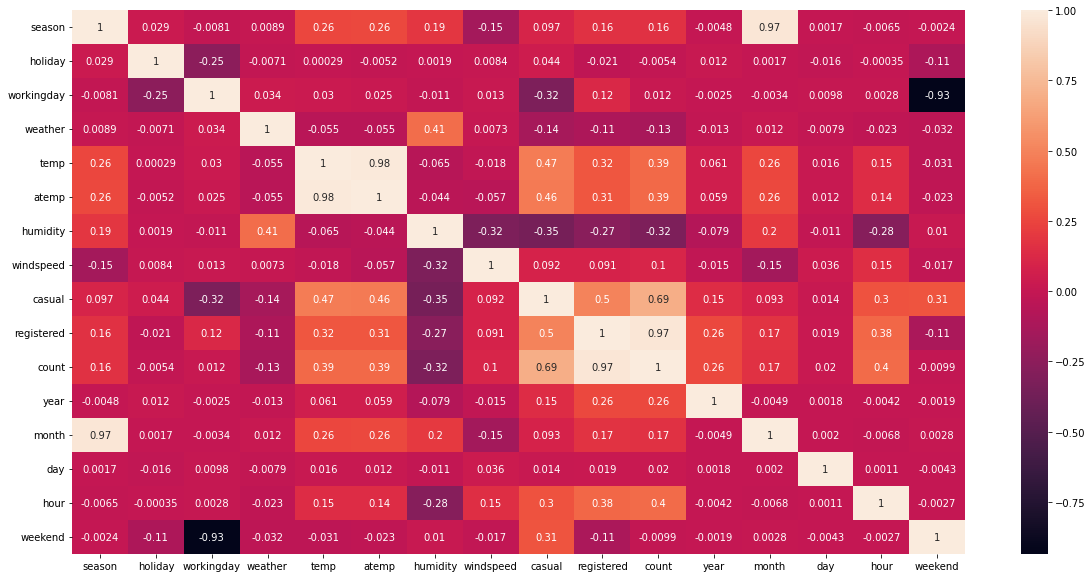

In [245]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

## Strorytelling - Visualization

Text(0.5, 1.0, 'Bike renting count according to weekdays type')

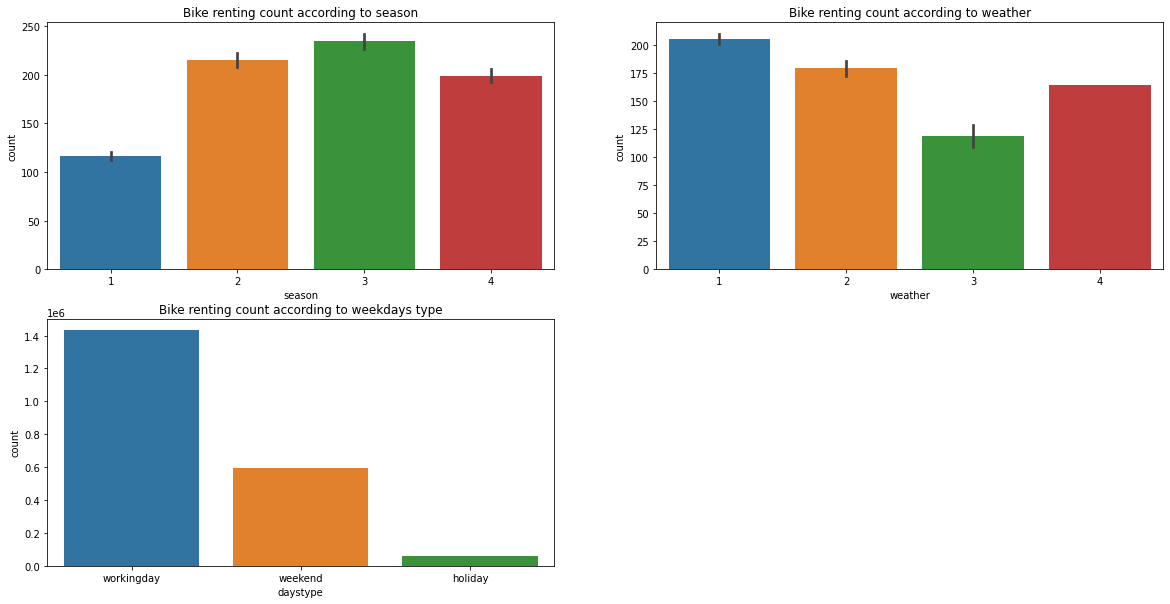

In [248]:
fig = plt.figure(figsize=(20,10))

axs1 = fig.add_subplot(221)
sns.barplot(x='season', y='count', data=df)
axs1.set_title('Bike renting count according to season')

axs2 = fig.add_subplot(222)
sns.barplot(x='weather', y='count', data=df)
axs2.set_title('Bike renting count according to weather')

axs3 = fig.add_subplot(223)
sns.barplot(x='daystype', y='count', data=dfdt)
axs3.set_title('Bike renting count according to weekdays type')

In [249]:
#TODO:
#draw another graph as soon

## Train your model (Regression)

## Test Result